In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = '06'

results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = []

for row in results:
    june_temps.append(list(row))

june_temps

[['2010-06-01', 78.0],
 ['2010-06-02', 76.0],
 ['2010-06-03', 78.0],
 ['2010-06-04', 76.0],
 ['2010-06-05', 77.0],
 ['2010-06-06', 78.0],
 ['2010-06-07', 77.0],
 ['2010-06-08', 78.0],
 ['2010-06-09', 78.0],
 ['2010-06-10', 79.0],
 ['2010-06-11', 78.0],
 ['2010-06-12', 78.0],
 ['2010-06-13', 78.0],
 ['2010-06-14', 77.0],
 ['2010-06-15', 78.0],
 ['2010-06-16', 78.0],
 ['2010-06-17', 77.0],
 ['2010-06-18', 77.0],
 ['2010-06-19', 82.0],
 ['2010-06-20', 78.0],
 ['2010-06-21', 78.0],
 ['2010-06-22', 78.0],
 ['2010-06-23', 78.0],
 ['2010-06-24', 78.0],
 ['2010-06-25', 77.0],
 ['2010-06-26', 76.0],
 ['2010-06-27', 78.0],
 ['2010-06-28', 78.0],
 ['2010-06-29', 78.0],
 ['2010-06-30', 78.0],
 ['2011-06-01', 77.0],
 ['2011-06-02', 78.0],
 ['2011-06-03', 73.0],
 ['2011-06-04', 70.0],
 ['2011-06-05', 76.0],
 ['2011-06-06', 77.0],
 ['2011-06-07', 77.0],
 ['2011-06-08', 77.0],
 ['2011-06-09', 77.0],
 ['2011-06-10', 78.0],
 ['2011-06-11', 77.0],
 ['2011-06-12', 77.0],
 ['2011-06-13', 78.0],
 ['2011-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'june_tobs'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df.drop('date', inplace=True, axis=1)
june_temps_df.head()

,june_tobs
date,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,june_tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str2 = '12'

results2 = session.query(Measurement.date, Measurement.tobs).\
            filter(func.strftime("%m", Measurement.date) == date_str2).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = []

for row in results2:
    dec_temps.append(list(row))

dec_temps

[['2010-12-01', 76.0],
 ['2010-12-03', 74.0],
 ['2010-12-04', 74.0],
 ['2010-12-06', 64.0],
 ['2010-12-07', 64.0],
 ['2010-12-08', 67.0],
 ['2010-12-09', 77.0],
 ['2010-12-10', 66.0],
 ['2010-12-11', 69.0],
 ['2010-12-12', 68.0],
 ['2010-12-13', 68.0],
 ['2010-12-14', 71.0],
 ['2010-12-15', 74.0],
 ['2010-12-16', 67.0],
 ['2010-12-17', 66.0],
 ['2010-12-18', 69.0],
 ['2010-12-19', 71.0],
 ['2010-12-23', 70.0],
 ['2010-12-24', 70.0],
 ['2010-12-26', 74.0],
 ['2010-12-27', 74.0],
 ['2010-12-28', 71.0],
 ['2010-12-29', 75.0],
 ['2010-12-30', 75.0],
 ['2010-12-31', 72.0],
 ['2011-12-01', 69.0],
 ['2011-12-02', 68.0],
 ['2011-12-03', 73.0],
 ['2011-12-04', 74.0],
 ['2011-12-05', 73.0],
 ['2011-12-06', 73.0],
 ['2011-12-07', 73.0],
 ['2011-12-08', 73.0],
 ['2011-12-09', 71.0],
 ['2011-12-10', 73.0],
 ['2011-12-11', 73.0],
 ['2011-12-12', 77.0],
 ['2011-12-13', 72.0],
 ['2011-12-14', 71.0],
 ['2011-12-15', 73.0],
 ['2011-12-16', 70.0],
 ['2011-12-17', 73.0],
 ['2011-12-18', 69.0],
 ['2011-12-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date', 'dec_tobs'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
dec_temps_df.drop('date', inplace=True, axis=1)
dec_temps_df.head()

,dec_tobs
date,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,dec_tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# Additional Queries

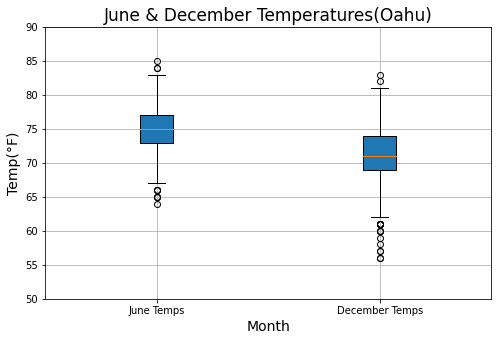

In [13]:
# Creating a box plot for the June and December temperatures
june_temp_data = []
i = 0
for i in range(len(june_temps)):
    june_temp_data.append(june_temps[i][1])
    i += 1

dec_temp_data = []
j = 0
for j in range(len(dec_temps)):
    dec_temp_data.append(dec_temps[j][1])
    j += 1

x_labels = ["June Temps", "December Temps"]
temperature_data = [june_temp_data, dec_temp_data]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('June & December Temperatures(Oahu)', fontsize=17)
ax.set_ylabel('Temp(°F)', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.boxplot(temperature_data, labels=x_labels, patch_artist=True)
ax.set_yticks(np.arange(50, 95, step=5.0))
ax.grid()
plt.savefig("Resources/temp_boxplot.png")
plt.show()

In [14]:
# Gathering weather data for the month of March
date_str3 = '03'

results3 = session.query(Measurement.date, Measurement.tobs).\
            filter(func.strftime("%m", Measurement.date) == date_str3).all()

march_temps = []

for row in results3:
    march_temps.append(list(row))

march_temps_df = pd.DataFrame(march_temps, columns=['date', 'march_tobs'])
march_temps_df.set_index(march_temps_df['date'], inplace=True)
march_temps_df.drop('date', inplace=True, axis=1)
march_temps_df.describe()

,march_tobs
count,1693.000000
mean,70.059067
std,3.845271
min,56.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,82.000000


In [15]:
# Gathering weather data for the month of Septebmer
date_str4 = '09'

results4 = session.query(Measurement.date, Measurement.tobs).\
            filter(func.strftime("%m", Measurement.date) == date_str4).all()

sept_temps = []

for row in results4:
    sept_temps.append(list(row))

sept_temps_df = pd.DataFrame(sept_temps, columns=['date', 'sept_tobs'])
sept_temps_df.set_index(sept_temps_df['date'], inplace=True)
sept_temps_df.drop('date', inplace=True, axis=1)
sept_temps_df.describe()

,sept_tobs
count,1480.000000
mean,76.164865
std,3.535178
min,64.000000
25%,74.000000
50%,76.000000
75%,79.000000
max,87.000000
